In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
(1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null 

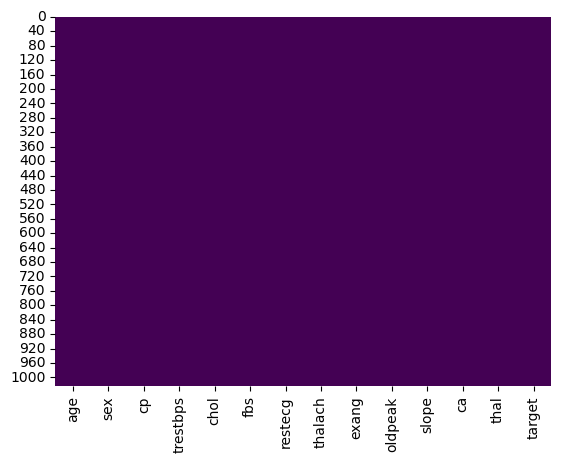

Categorical features are :  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical features are :  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [36]:
# Inspecting dataset
df=pd.read_csv('heart.csv')
print(df.head())
print(df.shape)
print("information about Dataset ",df.info())
print("Summary Statistics ",df.describe())
print("check dupicates ",df.duplicated().sum())
for i in df.columns:
    print(f"Number of unique values in {i}: ", df[i].nunique())
print("Checking Missing Values \n",df.isnull().sum())

print("Visualizing Missing values in dataset using Heatmap: \n")
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
print("Categorical features are : ",categorical_features)
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
print("numerical features are : ",numerical_features)

In [35]:
for col in df.columns:
    total_values = df[col].count()  # Total non-null entries
    unique_values = df[col].nunique()  # Number of unique entries
    duplicate_count = total_values - unique_values
    print(f"Number of duplicate entries in column '{col}': {duplicate_count}")
    
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.head())
df_cleaned=df.drop_duplicates()
print(df_cleaned["target"].value_counts())
# Since i have dropped only full duplicates row and still class imbalance is not significant so i can drop duplicates 
# integrity of dataset is maintained , the only concern is dataset is now reduced very much 



Number of duplicate entries in column 'age': 984
Number of duplicate entries in column 'sex': 1023
Number of duplicate entries in column 'cp': 1021
Number of duplicate entries in column 'trestbps': 976
Number of duplicate entries in column 'chol': 873
Number of duplicate entries in column 'fbs': 1023
Number of duplicate entries in column 'restecg': 1022
Number of duplicate entries in column 'thalach': 934
Number of duplicate entries in column 'exang': 1023
Number of duplicate entries in column 'oldpeak': 985
Number of duplicate entries in column 'slope': 1022
Number of duplicate entries in column 'ca': 1020
Number of duplicate entries in column 'thal': 1021
Number of duplicate entries in column 'target': 1023
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15   34    0   1       118   210    0        1      192      0      0.7   
31   50    0   1       120   244    0        1      162      0      1.1   
43   46    1   0       120   249    0        0      144 

In [44]:
from sklearn.preprocessing import OrdinalEncoder
df_encoded=df_cleaned.copy()
print(df_encoded.shape)
ordinal_features = ["cp", "slope", "ca"]
Ordinal_encoder=OrdinalEncoder()
df_encoded[ordinal_features]=Ordinal_encoder.fit_transform(df_encoded[ordinal_features])

all_features = df_cleaned.columns.tolist()  

nominal_features = list(set(all_features) - set(ordinal_features))
df_encoded = pd.get_dummies(df, columns=["restecg", "thal"], drop_first=True)
print(df_encoded.shape)

(302, 14)
(1025, 17)


In [45]:
# separting Dataframe into target and rest features
X=df_encoded.drop('target',axis=1)
y=df_encoded['target']
print(X.head())
print(y.head())



   age  sex  cp  trestbps  chol  fbs  thalach  exang  oldpeak  slope  ca  \
0   52    1   0       125   212    0      168      0      1.0      2   2   
1   53    1   0       140   203    1      155      1      3.1      0   0   
2   70    1   0       145   174    0      125      1      2.6      0   0   
3   61    1   0       148   203    0      161      0      0.0      2   1   
4   62    0   0       138   294    1      106      0      1.9      1   3   

   restecg_1  restecg_2  thal_1  thal_2  thal_3  
0       True      False   False   False    True  
1      False      False   False   False    True  
2       True      False   False   False    True  
3       True      False   False   False    True  
4       True      False   False    True   False  
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


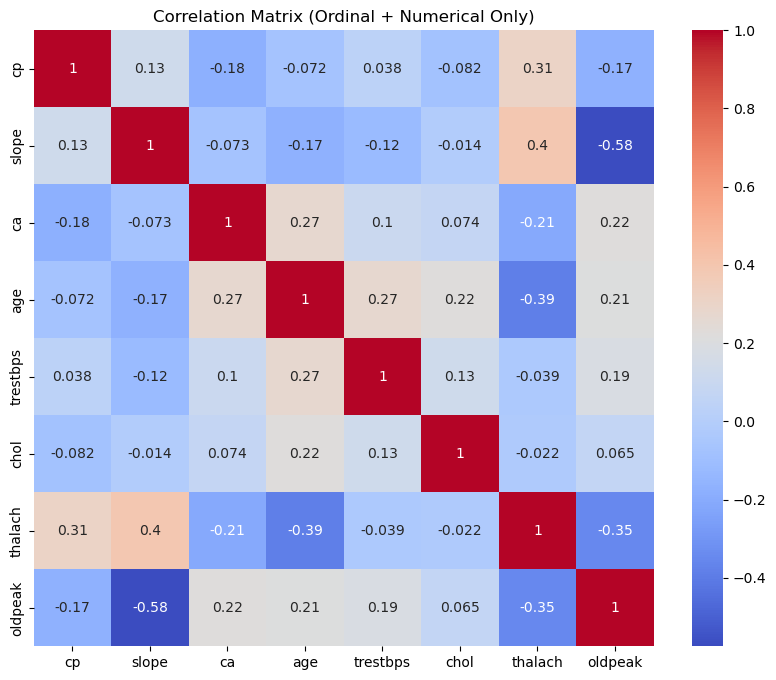

Highly correlated pairs: []


In [48]:
# Apply correlation matrix only for numerical and oridnal(Encoded ) Features , becouse .corr() uses Pearson Correlation coefficient
# that works only on Numerical and properly Encoded ordinal features where numbers has some meanings 
# In Nominal features although we have encoded but numbers has no meaning so we only apply for Numerical and ordinal features
# Since we are going to train decision Tree we strictly don't need to drop higly correlated Features there is no drawback of Multicollinearity
# in Decsion Tree that is not relevant and comes into matter when Training some Linear model to detect Multicollinearity

# You do NOT need to drop highly correlated features.
# The tree will automatically choose the most informative split at each step.
# Including correlated features does not hurt model performance, though it might increase tree depth slightly.
selected_corr_features = ordinal_features + numerical_features
plt.figure(figsize=(10, 8))
sns.heatmap(df[selected_corr_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Ordinal + Numerical Only)")
plt.show()


# Print correlated feature pairs (correlation > 0.8)
corr_matrix = df[selected_corr_features].corr().abs()
high_corr_pairs = [
    (i, j)
    for i in corr_matrix.columns
    for j in corr_matrix.columns
    if i != j and corr_matrix.loc[i, j] > 0.8
]
print("Highly correlated pairs:", high_corr_pairs)


cp           0.281747
ca           0.147205
thal_2       0.124343
age          0.123174
chol         0.106943
oldpeak      0.059049
thalach      0.054173
sex          0.027378
trestbps     0.027337
restecg_1    0.025927
slope        0.013389
exang        0.009336
fbs          0.000000
restecg_2    0.000000
thal_1       0.000000
thal_3       0.000000
dtype: float64


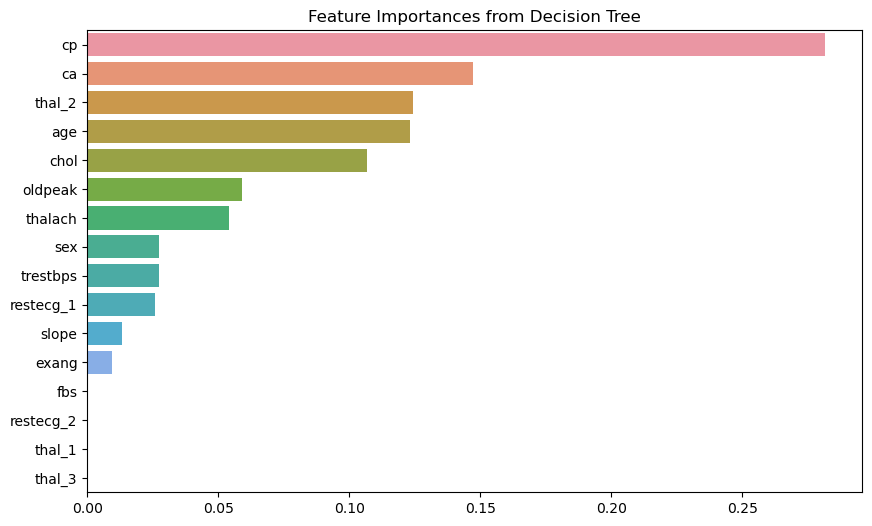

Dropped features: ['fbs', 'exang', 'restecg_2', 'thal_1', 'thal_3']


In [52]:
# Feature Importance from Decision Tree (Best way to select features for tree-based models)

# Model automatically select best Features
# You can then:
# Drop features with very low importance (e.g., < 0.01)
# Visualize using barplot:

from sklearn.tree import DecisionTreeClassifier
import pandas as pd

model = DecisionTreeClassifier()
model.fit(X, y)

# Get feature importances
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importances from Decision Tree")
plt.show()

features_dropped = []

for i in X.columns:
    if feature_importance[i] < 0.01:
        X.drop(i, axis=1, inplace=True)  # ← i, not 'i'
        features_dropped.append(i)  # ← append(i), not +=i

print("Dropped features:", features_dropped)


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205

testing dataset accuracy  0.9512195121951219


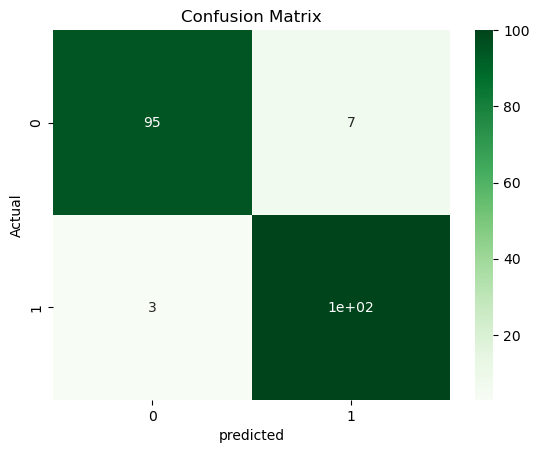

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the model
rf_model = RandomForestClassifier(n_estimators=120, max_depth=7, random_state=42)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2,random_state=42)
rf_model.fit(X_train,y_train)
y_predict=rf_model.predict(X_test)

print("Classification Report: \n",classification_report(y_predict,y_test))
from sklearn.metrics import accuracy_score
testing_accuracy=accuracy_score(y_test,y_predict)
print("testing dataset accuracy ",testing_accuracy)

Confusion_matrix=confusion_matrix(y_test,y_predict)
sns.heatmap(Confusion_matrix,annot=True,cmap="Greens")

plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Perform 5-Fold Cross-Validation and evaluate with accuracy
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring="accuracy")

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())



Classification Report (CV):
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       499
           1       0.98      0.99      0.98       526

    accuracy                           0.98      1025
   macro avg       0.98      0.98      0.98      1025
weighted avg       0.98      0.98      0.98      1025



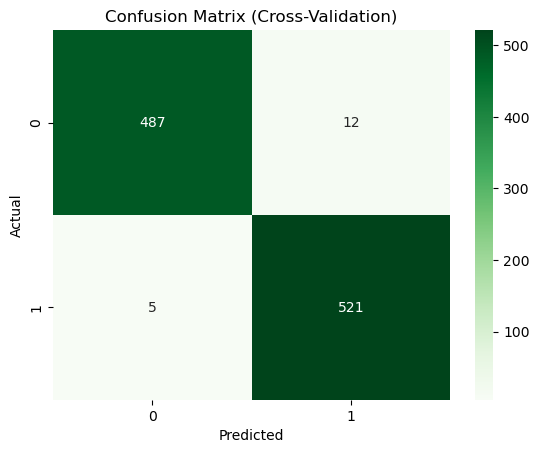

In [75]:
from sklearn.model_selection import cross_val_predict

# Get predictions from cross-validation
y_pred_cv = cross_val_predict(rf_model, X, y, cv=5)

# Classification report
print("\nClassification Report (CV):\n", classification_report(y, y_pred_cv))

# Confusion Matrix
cm = confusion_matrix(y, y_pred_cv)
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Cross-Validation)")
plt.show()


In [ ]:
import pandas as pd

custom_input = pd.DataFrame(
    [
        {
            "age": 53,
            "sex": 1,
            "cp": 1,
            "trestbps": 120,
            "chol": 269,
            "thalach": 121,
            "oldpeak": 0.2,
            "slope": 2,
            "ca": 1,
            "restecg_1": False,
            "thal_2": True,
        }
    ]
)
